In [1]:
# Step 1: Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: Interactive plots
#import plotly.express as px


In [4]:
# Step 2: Load Data from Folders
enrolment_folder = "api_data_aadhar_enrolment"
demographic_folder = "api_data_aadhar_demographic"
biometric_folder = "api_data_aadhar_biometric"

# Load all CSV/Excel files from each folder
def load_all_data(folder_path):
    all_files = os.listdir(folder_path)
    df_list = []
    for file in all_files:
        if file.endswith(".csv"):  # or .xlsx if Excel
            df_list.append(pd.read_csv(os.path.join(folder_path, file)))
    return pd.concat(df_list, ignore_index=True)

df_enrolment = load_all_data(enrolment_folder)
df_demographic = load_all_data(demographic_folder)
df_biometric = load_all_data(biometric_folder)


In [3]:
print(df_demographic.head())
print(df_demographic.info())
print(df_demographic.isnull().sum())

         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB
None
date             0
state            0
district         0
pincode          0
demo_age_5_17    

In [5]:
df_demographic.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [6]:
df_demographic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [7]:
df_demographic.isnull().sum()


date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

In [12]:
df_demographic['date'] = pd.to_datetime(df_demographic['date'], errors='coerce')
df_demographic['year'] = df_demographic['date'].dt.year
df_demographic['month'] = df_demographic['date'].dt.month


In [ ]:
age_cols = [
    'demo_age_5_17',
    'demo_age_17_'
]


df_demographic['total_population'] = df_demographic[age_cols].sum(axis=1)


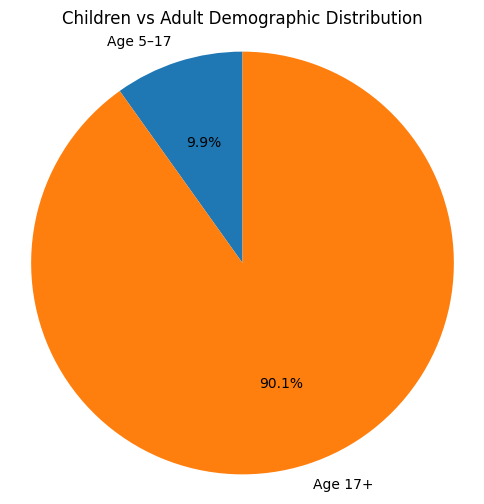

In [15]:
age_dist = df_demographic[age_cols].sum()

plt.figure(figsize=(6,6))
plt.pie(
    age_dist,
    labels=['Age 5–17', 'Age 17+'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Children vs Adult Demographic Distribution")
plt.axis('equal')
plt.show()


In [16]:
df_demographic['child_ratio'] = (
    df_demographic['demo_age_5_17'] /
    df_demographic['total_population']
)

state_child_ratio = (
    df_demographic.groupby('state')['child_ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

state_child_ratio


state
Dadra and Nagar Haveli    0.241923
Ladakh                    0.199191
Manipur                   0.185744
Arunachal Pradesh         0.180745
Puducherry                0.175745
Tamil Nadu                0.165209
Telangana                 0.158373
Lakshadweep               0.156533
Daman and Diu             0.153710
Andhra Pradesh            0.152555
Name: child_ratio, dtype: float64

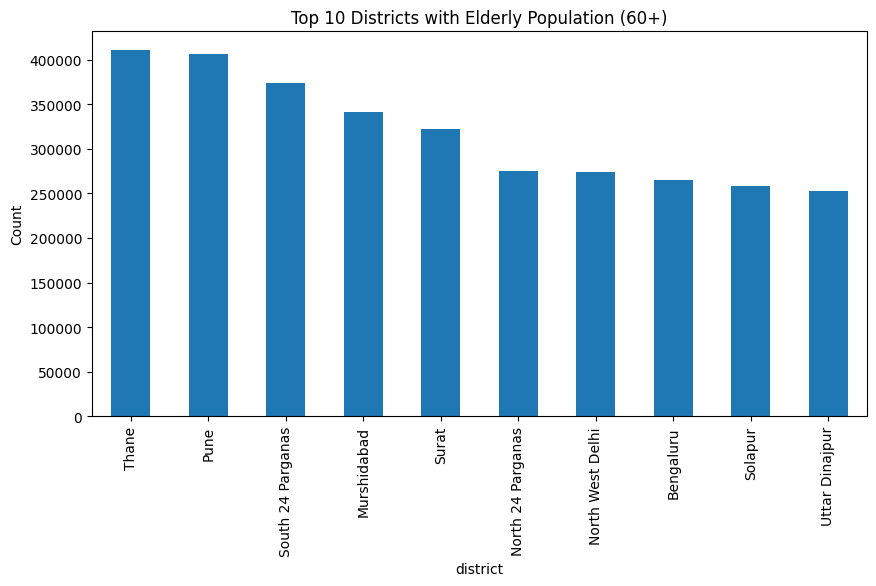

In [18]:
elderly_districts = (
    df_demographic.groupby('district')['demo_age_17_']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
elderly_districts.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Districts with Elderly Population (60+)")
plt.ylabel("Count")
plt.show()


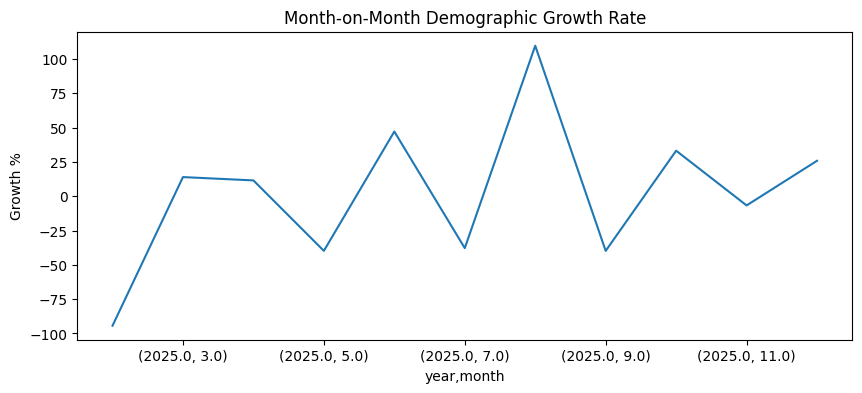

In [20]:
monthly_total = df_demographic.groupby(['year','month'])['total_population'].sum()
growth_rate = monthly_total.pct_change() * 100

growth_rate.plot(figsize=(10,4))
plt.title("Month-on-Month Demographic Growth Rate")
plt.ylabel("Growth %")
plt.show()


In [21]:
low_coverage = df_demographic[
    df_demographic['total_population'] < df_demographic['total_population'].quantile(0.25)
]

low_coverage[['state','district','total_population']].head()


,state,district,total_population
4179,Karnataka,Belagavi,2
4181,Karnataka,Belagavi,2
4182,Karnataka,Belagavi,2
4187,Karnataka,Belagavi,1
4188,Karnataka,Belagavi,1


In [23]:
df_demographic['age_diversity_score'] = df_demographic[age_cols].std(axis=1)


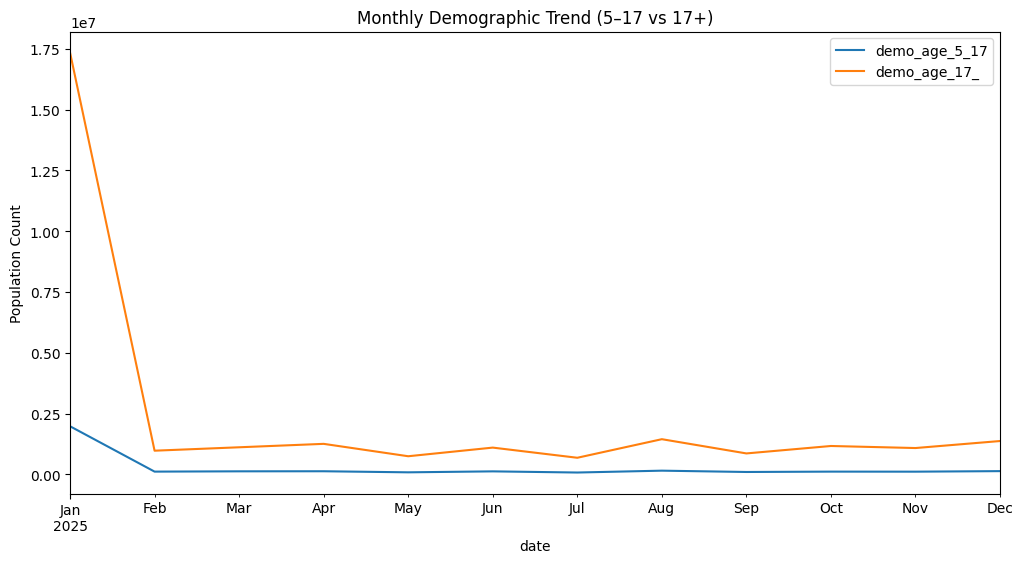

In [24]:
df_demographic['date'] = pd.to_datetime(df_demographic['date'], dayfirst=True)

monthly_trend = df_demographic.groupby(
    df_demographic['date'].dt.to_period('M')
)[age_cols].sum()

monthly_trend.plot(figsize=(12,6))
plt.title("Monthly Demographic Trend (5–17 vs 17+)")
plt.ylabel("Population Count")
plt.show()
